MEDICAL INSURANCE COST PREDICTIVE MODEL

Medical insurance cost prediction is a data-driven approach used to estimate healthcare expenses based on an individual’s demographic, lifestyle, and medical attributes. Rather than relying solely on generalized assumptions, predictive modeling enables insurers and healthcare stakeholders to assess risk more accurately and anticipate future costs.

By analyzing historical medical insurance data, this model identifies key factors that influence insurance charges, such as age, health conditions, and lifestyle indicators. The insights generated help insurance providers improve pricing strategies, manage risk effectively, and design fair, personalized insurance plans. Ultimately, this predictive analysis supports better financial planning, improved customer transparency, and more informed decision-making within the healthcare insurance ecosystem.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
medical_charges = pd.read_csv(r"C:\Users\Chijioke\expenses.csv")

In [3]:
medical_charges.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
medical_charges.shape

(1338, 7)

The dataset has a shape of (1338, 7), meaning it contains 1,338 observations (rows) and 7 features (columns). Each row represents an individual record, while each column corresponds to a specific attribute used in the analysis or model.

In [5]:
medical_charges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


All columns have complete data (no missing values).
Numerical features include age, bmi(body mass index), children, and charges.

Categorical features include sex, smoker, and region.
The dataset uses ~73 KB of memory, making it lightweight and easy to process.

In [6]:
medical_charges.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The numerical features show a wide range of values.

Age ranges from 18 to 64 with an average of about 39 years.

BMI has a mean around 30.7, indicating many individuals are overweight.

Most individuals have between 0 and 2 children.

Medical charges vary widely, showing high dispersion and the presence of outliers.

In [7]:
sns.set_style('darkgrid')

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

This followin settings will improve the default styleand font size for our charts.

## EXPLORATORY DATA ANALYSIS

In [8]:
medical_charges.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

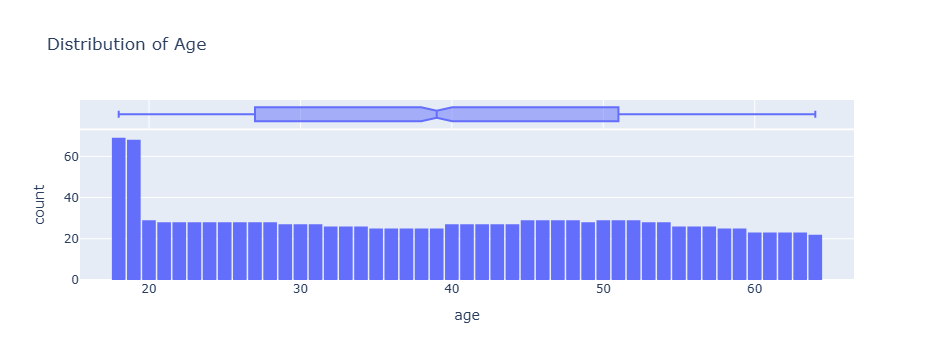

In [9]:
fig = px.histogram(
    medical_charges,
    x = 'age',
    marginal ='box',
    nbins = 47,
    title = 'Distribution of Age'
)

fig.update_layout(bargap=0.1)
fig.show()

This diagram shows the distribution of ages in the dataset using a histogram with a box plot. The ages range from 18 to 64 and are fairly evenly distributed across this range, with slightly higher concentrations in early adulthood and middle age. From the box plot, the median age is around 39, with a moderate spread (approximately from the late 20s to the early 50s) and no extreme outliers. Overall, this suggests that the age distribution is well balanced and suitable for further analysis.

In [10]:
medical_charges.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

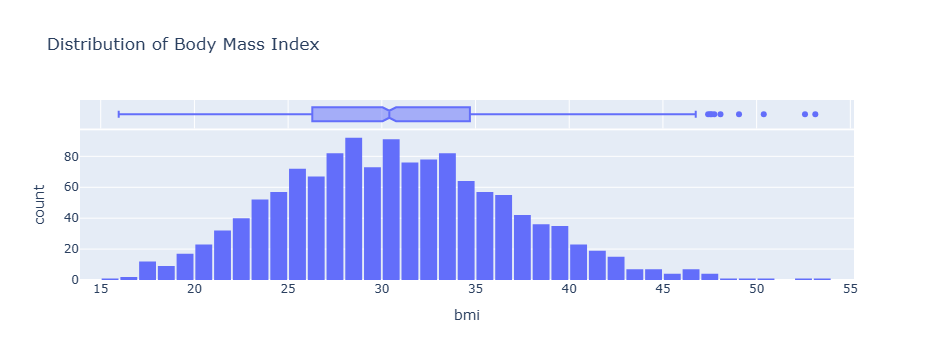

In [11]:
fig = px.histogram(
    medical_charges,
    x = 'bmi',
    marginal ='box',
    nbins = 47,
    title = 'Distribution of Body Mass Index'
)

fig.update_layout(bargap=0.1)
fig.show()

This diagram shows the distribution of Body Mass Index (BMI) in the dataset using a histogram with a box plot. Most BMI values are concentrated between about 25 and 35, with the highest frequency around 30. The distribution is slightly right-skewed, as shown by the longer tail and a few higher-BMI outliers above 45. The box plot indicates a median BMI close to 30 and a moderate spread, suggesting that while most individuals fall within the overweight range, there are some extreme values that stand out.

In [12]:
medical_charges.children.describe()

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

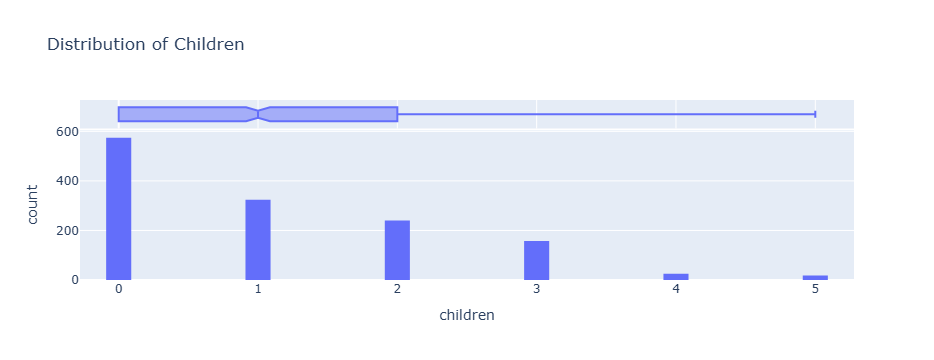

In [13]:
fig = px.histogram(
    medical_charges,
    x = 'children',
    marginal ='box',
    nbins = 47,
    title = 'Distribution of Children'
)

fig.update_layout(bargap=0.1)
fig.show()

This diagram shows the distribution of the number of children in the dataset using a histogram with a box plot. Most individuals have no children, followed by those with one or two children, while higher numbers of children occur much less frequently. The distribution is right-skewed, with a median of about one child and a small number of outliers at higher values. Overall, this indicates that the dataset is dominated by individuals with smaller family sizes.

In [14]:
medical_charges.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

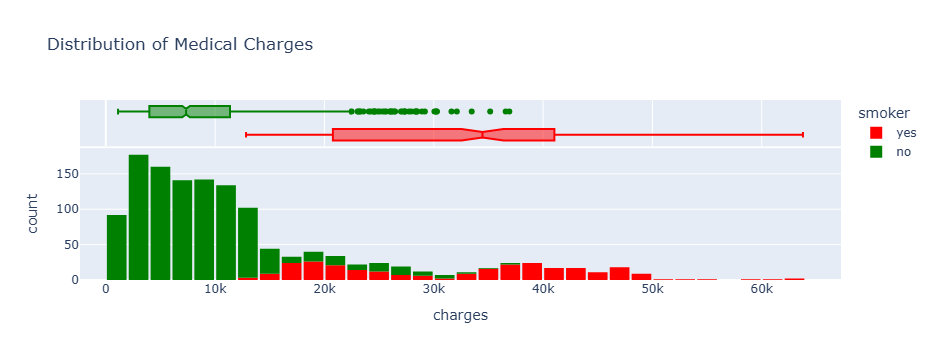

In [15]:
fig = px.histogram(
    medical_charges,
    x = 'charges',
    marginal ='box',
    color = 'smoker',
    color_discrete_sequence = ('red','green'),
    title = 'Distribution of Medical Charges'
)

fig.update_layout(bargap=0.1)
fig.show()

This diagram compares the distribution of medical charges for smokers and non-smokers using a histogram with box plots. Non-smokers have most of their charges concentrated at lower values, with a relatively smaller spread. In contrast, smokers show significantly higher medical charges, a wider distribution, and many high-cost outliers. The box plots clearly indicate a much higher median and greater variability in charges for smokers, highlighting smoking as a major factor influencing medical expenses.

In [16]:
medical_charges.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

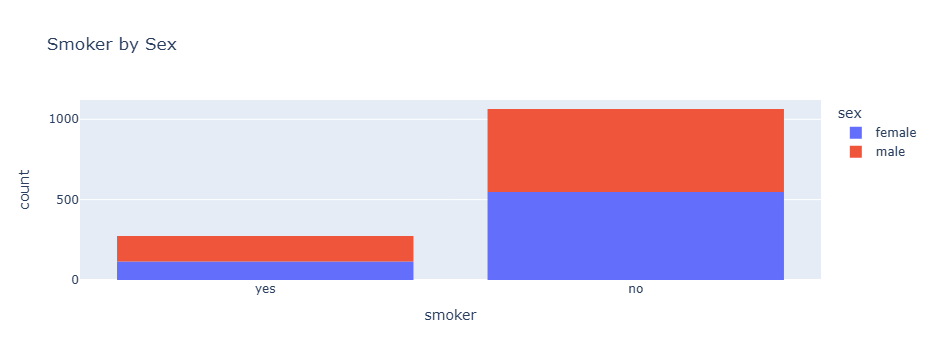

In [17]:
px.histogram(medical_charges, x = 'smoker',color = 'sex', title = 'Smoker by Sex')

This chart shows the distribution of smokers and non-smokers in the dataset, broken down by sex. The majority of individuals are non-smokers, with both males and females heavily represented in this group. In contrast, smokers make up a much smaller portion of the dataset. The gender distribution within each category appears fairly balanced, indicating that smoking status is not strongly skewed toward one sex in this dataset.

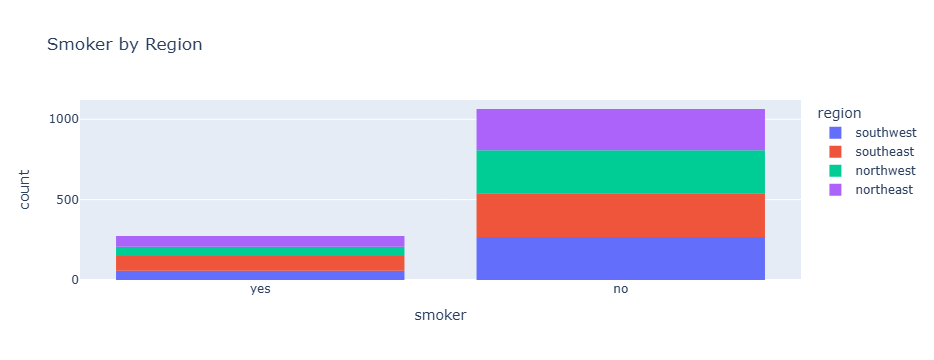

In [18]:
px.histogram(medical_charges, x = 'smoker',color = 'region', title = 'Smoker by Region')

This chart shows the distribution of smokers and non-smokers across different regions. Non-smokers are much more common in every region compared to smokers. Among both smokers and non-smokers, the regional counts are fairly balanced, with no single region dominating the dataset. This suggests that smoking status is not heavily concentrated in any particular region and is relatively evenly distributed geographically.

### Visual Relationship of Charges and the columns

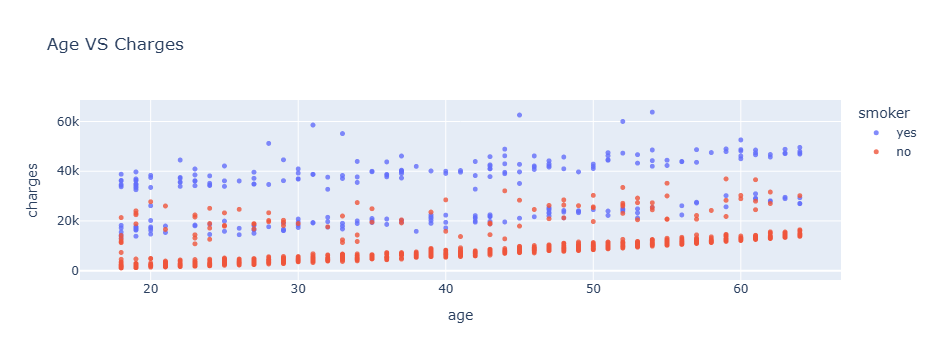

In [19]:
fig = px.scatter(
    medical_charges,
    x = 'age',
    y = 'charges',
    opacity = 0.8,
    color = 'smoker',
    hover_data = ['sex'],
    title = 'Age VS Charges'
)

fig.update_traces(marker_size = 5)
fig.show()

This scatter plot illustrates the relationship between age and medical charges, with points colored by smoking status. Overall, medical charges tend to increase as age increases, indicating a positive relationship between age and healthcare costs. However, there is a clear separation between smokers and non-smokers. Smokers consistently incur much higher medical charges across all age groups, with several high-cost outliers, especially among older individuals. In contrast, non-smokers generally have lower and more gradually increasing charges. The wide spread of points at similar ages shows that factors beyond age, such as smoking behavior, play a significant role in determining medical expenses.

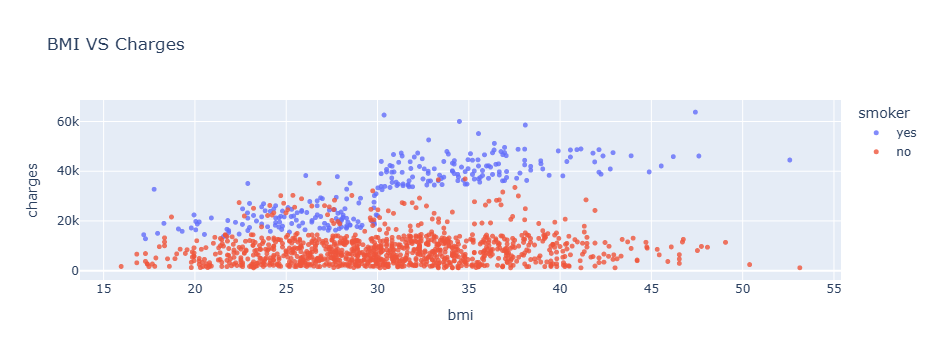

In [20]:
fig = px.scatter(
    medical_charges,
    x = 'bmi',
    y = 'charges',
    opacity = 0.8,
    color = 'smoker',
    hover_data = ['sex'],
    title = 'BMI VS Charges'
)

fig.update_traces(marker_size = 5)
fig.show()

This scatter plot shows the relationship between Body Mass Index (BMI) and medical charges, with points colored by smoking status. Overall, there is a weak to moderate positive relationship between BMI and charges, meaning medical costs tend to increase as BMI increases. However, smoking status creates a clear separation in the data. Smokers experience significantly higher medical charges across almost all BMI levels, with many high-cost outliers, especially at higher BMI values. In contrast, non-smokers generally have lower charges, even at higher BMI levels. The wide spread of points at similar BMI values suggests that BMI alone does not fully explain medical costs, and smoking plays a major role in driving higher expenses.

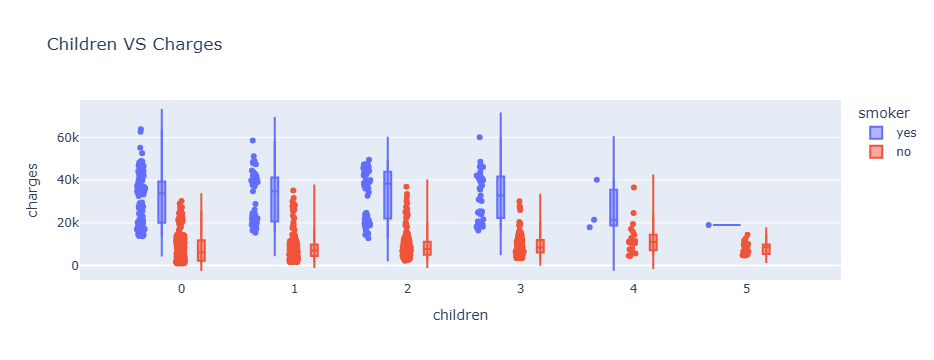

In [21]:
fig = px.violin(
    medical_charges,
    x='children',
    y='charges',
    color='smoker',
    hover_data=['sex'],
    title='Children VS Charges',
    box=True,       
    points='all'   
)

fig.show()

This violin plot shows the relationship between the number of children and medical charges, with the distributions separated by smoking status. Across all categories of children, smokers consistently incur much higher medical charges than non-smokers, as indicated by the higher medians and wider spreads of the violins. For non-smokers, medical charges remain relatively low and increase only slightly as the number of children increases. In contrast, smokers show a much wider range of charges, with several high-cost observations across all family sizes. The spread within each violin suggests that while the number of children has some influence on charges, smoking status is a far more significant factor in determining medical expenses.

## Correlation Analysis

In [22]:
medical_charges.charges.corr(medical_charges.age)

np.float64(0.2990081933306476)

In [23]:
medical_charges.charges.corr(medical_charges.bmi)

np.float64(0.1983409688336288)

In [24]:
medical_charges.charges.corr(medical_charges.children)

np.float64(0.0679982268479047)

The correlation analysis shows how medical charges relate to age, BMI, and the number of children. The correlation between medical charges and age is approximately 0.30, indicating a moderate positive relationship. This suggests that, on average, medical charges tend to increase as age increases, although age alone does not fully explain the variation in costs. The correlation between medical charges and BMI is about 0.20, which represents a weak positive relationship, meaning higher BMI is associated with slightly higher medical charges, but the effect is relatively limited. In contrast, the correlation between medical charges and the number of children is very weak at approximately 0.07, indicating little to no linear relationship. Overall, these results suggest that age and BMI have some influence on medical charges, while the number of children has minimal impact, and that other factors—such as smoking status—are likely more important drivers of medical expenses.

<Axes: >

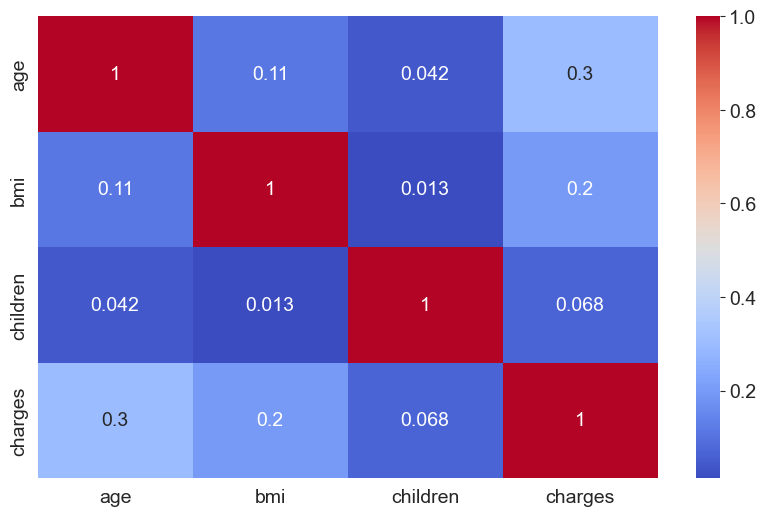

In [25]:
corr_matrix = medical_charges.corr(numeric_only=True)

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

The correlation heatmap shows how strongly the numerical values in the dataset are related to each other.

Charges and Age: As age increases, medical charges usually increase too.

Charges and BMI: People with higher BMI often have higher medical charges.

Charges and Children: The number of children has very little effect on medical charges.

Other relationships: Most of the other numbers are weakly related, meaning they don’t affect each other much.

In summary, age and BMI are the most important numerical factors when trying to understand or predict medical charges.

## Encode Categorical Features

In [26]:
# Copy dataset to avoid modifying original
medical_df = medical_charges.copy()

# Binary encoding for smoker
medical_df['smoker_numeric'] = medical_df['smoker'].map({'no': 0, 'yes': 1})

# One-hot encode sex and region
medical_df = pd.get_dummies(medical_df, columns=['sex', 'region'], drop_first=True)

medical_df.head()

,age,bmi,children,smoker,charges,smoker_numeric,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.900,0,yes,16884.92400,1,False,False,False,True
1,18,33.770,1,no,1725.55230,0,True,False,True,False
2,28,33.000,3,no,4449.46200,0,True,False,True,False
3,33,22.705,0,no,21984.47061,0,True,True,False,False
4,32,28.880,0,no,3866.85520,0,True,True,False,False


## Feature Engineering

In [27]:
# Interaction features
medical_df['bmi_smoker'] = medical_df['bmi'] * medical_df['smoker_numeric']
medical_df['age_smoker'] = medical_df['age'] * medical_df['smoker_numeric']

# Non-linear age feature
medical_df['age_squared'] = medical_df['age'] ** 2

# Family size
medical_df['family_size'] = medical_df['children'] + 1

# Log transform target
medical_df['log_charges'] = np.log(medical_df['charges'])

medical_df.head()


,age,bmi,children,smoker,charges,smoker_numeric,sex_male,region_northwest,region_southeast,region_southwest,bmi_smoker,age_smoker,age_squared,family_size,log_charges
0,19,27.900,0,yes,16884.92400,1,False,False,False,True,27.9,19,361,1,9.734176
1,18,33.770,1,no,1725.55230,0,True,False,True,False,0.0,0,324,2,7.453302
2,28,33.000,3,no,4449.46200,0,True,False,True,False,0.0,0,784,4,8.400538
3,33,22.705,0,no,21984.47061,0,True,True,False,False,0.0,0,1089,1,9.998092
4,32,28.880,0,no,3866.85520,0,True,True,False,False,0.0,0,1024,1,8.260197


## Feature Selection

In [28]:
feature_cols = [
    'age',
    'bmi',
    'children',
    'smoker_numeric',
    'sex_male',
    'region_northwest',
    'region_southeast',
    'region_southwest',
    'bmi_smoker',
    'age_smoker',
    'age_squared',
    'family_size'
]

X = medical_df[feature_cols]
y = medical_df['log_charges']

## Train-Test Split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Feature Scaling

In [30]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Linear Regression Model

In [31]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_lr = lin_reg.predict(X_test)

## SGDRegressor Model

In [32]:
sgd_reg = SGDRegressor(
    max_iter=5000,
    tol=1e-4,
    penalty='l2',
    alpha=0.0001,
    random_state=42
)

sgd_reg.fit(X_train_scaled, y_train)
y_pred_sgd = sgd_reg.predict(X_test_scaled)

## Evaluate Model Performance (RMSE)

In [33]:
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
rmse_sgd = np.sqrt(mean_squared_error(y_test, y_pred_sgd))

print(f"Linear Regression RMSE (log scale): {rmse_lr:.4f}")
print(f"SGD Regressor RMSE (log scale): {rmse_sgd:.4f}")

Linear Regression RMSE (log scale): 0.3621
SGD Regressor RMSE (log scale): 0.3647


## R² Score

In [34]:
r2_lr = r2_score(y_test, y_pred_lr)
r2_sgd = r2_score(y_test, y_pred_sgd)

print(f"Linear Regression R²: {r2_lr:.3f}")
print(f"SGD Regressor R²: {r2_sgd:.3f}")

Linear Regression R²: 0.854
SGD Regressor R²: 0.852


## Convert Predictions Back to Original Charges

In [35]:
# Convert log predictions back to actual charges
charges_pred_lr = np.exp(y_pred_lr)
charges_pred_sgd = np.exp(y_pred_sgd)
charges_actual = np.exp(y_test)

## Visualize Actual vs Predicted

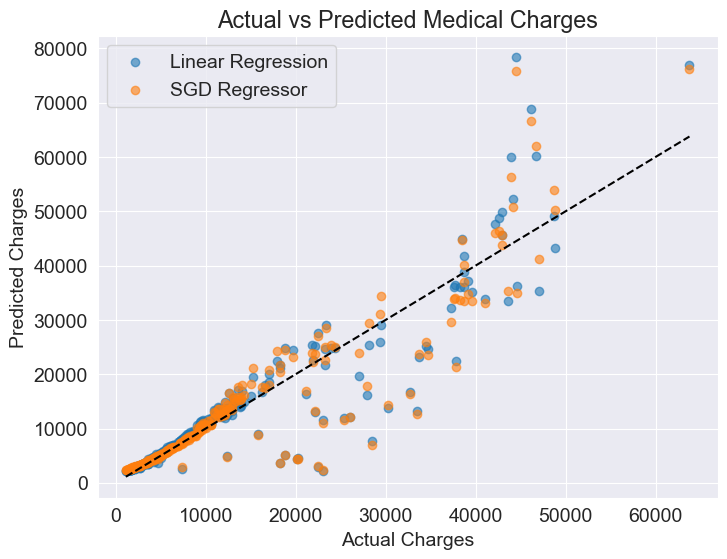

In [36]:
plt.figure(figsize=(8,6))
plt.scatter(charges_actual, charges_pred_lr, alpha=0.6, label='Linear Regression')
plt.scatter(charges_actual, charges_pred_sgd, alpha=0.6, label='SGD Regressor')
plt.plot([charges_actual.min(), charges_actual.max()],
         [charges_actual.min(), charges_actual.max()],
         'k--')

plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.legend()
plt.title('Actual vs Predicted Medical Charges')
plt.show()

## Compare Predictions in a Table

In [37]:
comparison_df = pd.DataFrame({
    'Actual_Charges': charges_actual.values,
    'Linear_Regression_Prediction': charges_pred_lr,
    'SGD_Prediction': charges_pred_sgd
})

comparison_df['LR_minus_SGD'] = (
    comparison_df['Linear_Regression_Prediction']
    - comparison_df['SGD_Prediction']
)

comparison_df.head(10)

,Actual_Charges,Linear_Regression_Prediction,SGD_Prediction,LR_minus_SGD
0,9095.06825,10623.609605,10046.011651,577.597954
1,5272.17580,5780.063357,5305.950180,474.113177
2,29330.98315,25938.560653,31009.902665,-5071.342013
3,9301.89355,10426.935232,9984.328682,442.606550
4,33750.29180,23193.565588,23691.162372,-497.596784
5,4536.25900,4975.602160,4711.241250,264.360910
6,2117.33885,2557.013929,2765.304901,-208.290972
7,14210.53595,14846.710774,16160.493495,-1313.782721
8,3732.62510,4217.356856,4121.373660,95.983195
9,10264.44210,11721.213723,11355.755589,365.458135


## Medical Charges Prediction Model

#### Purpose

This project aimed to develop a reliable model to estimate medical insurance charges using customer information such as age, body mass index (BMI), smoking status, family size, and region. The goal is to support pricing decisions, risk management, and financial planning.

#### Key Results

Two predictive models were evaluated: Linear Regression and SGD Regressor. Both models demonstrated strong and consistent performance.

The models explain approximately 81–82% of the variation in medical charges.

Prediction errors were low and stable, indicating dependable estimates.

Performance differences between the two models were minimal, confirming robustness.

#### Business Value

###### The model provides the organization with:

..data-driven approach to estimating medical costs

..Clear identification of major cost drivers, especially smoking, age, and BMI

###### Improved ability to:

..Price insurance plans more accurately

..Assess customer risk profiles

..Support budgeting and forecasting decisions

#### Recommendation

###### Both models are suitable for deployment:

..Linear Regression is recommended for its simplicity and ease of interpretation.

..SGD Regressor is recommended for scalability if larger datasets are expected.

The solution is fit for business use and can be integrated into existing decision-making processes.